In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
user_profiles_df = pd.read_csv('data/user_profiles_genres.csv', index_col='user_id')
user_profiles_df

,genre_action,genre_adventure,genre_drama,genre_fantasy,genre_magic,genre_military,genre_shounen,genre_sci-fi,genre_thriller,genre_space,...,genre_shoujo,genre_demons,genre_dementia,genre_cars,genre_music,genre_ai,genre_kids,genre_hentai,genre_yaoi,genre_yuri
user_id,,,,,,,,,,,,,,,,,,,,,
1,14.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,134.0,99.0,54.0,107.0,22.0,11.0,84.0,23.0,12.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0
5,25.0,32.0,19.0,17.0,4.0,2.0,28.0,8.0,7.0,0.0,...,-2.0,3.0,-3.0,0.0,-3.0,0.0,6.0,0.0,0.0,0.0
7,130.0,65.0,48.0,80.0,31.0,21.0,80.0,89.0,22.0,0.0,...,0.0,11.0,7.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73511,10.0,10.0,0.0,10.0,10.0,0.0,0.0,13.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73512,10.0,11.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
73513,27.0,36.0,26.0,28.0,4.0,3.0,0.0,20.0,0.0,6.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
user_profiles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
genre_action,66974.0,72.772471,69.781278,-111.0,19.0,53.0,107.0,712.0
genre_adventure,66974.0,32.978298,31.373847,-36.0,7.0,25.0,50.0,435.0
genre_drama,66974.0,41.570400,37.463997,-51.0,12.0,32.0,62.0,400.0
genre_fantasy,66974.0,40.362506,39.459754,-50.0,10.0,29.0,59.0,471.0
genre_magic,66974.0,12.575059,13.863758,-24.0,0.0,8.0,19.0,169.0
genre_military,66974.0,10.685818,11.965659,-18.0,0.0,7.0,18.0,103.0
genre_shounen,66974.0,30.610655,30.952655,-39.0,7.0,22.0,45.0,340.0
genre_sci-fi,66974.0,30.293606,32.583552,-57.0,6.0,20.0,46.0,405.0
genre_thriller,66974.0,11.073402,11.136311,-15.0,0.0,7.0,18.0,63.0
genre_space,66974.0,1.734061,3.768217,-6.0,0.0,0.0,0.0,55.0


In [11]:
scaler = StandardScaler()
user_profiles_df[user_profiles_df.columns] = scaler.fit_transform(user_profiles_df.values)

In [13]:
user_profiles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
genre_action,66974.0,-5.675939e-17,1.000007,-2.633569,-0.770592,-0.283351,0.490501,9.160513
genre_adventure,66974.0,-7.256715e-17,1.000007,-2.198609,-0.828030,-0.254300,0.542548,12.814007
genre_drama,66974.0,-7.214278e-17,1.000007,-2.470935,-0.789308,-0.255458,0.545317,9.567379
genre_fantasy,66974.0,-3.946634e-17,1.000007,-2.290009,-0.769461,-0.287954,0.472320,10.913416
genre_magic,66974.0,5.198524e-17,1.000007,-2.638198,-0.907052,-0.330004,0.463438,11.283096
genre_military,66974.0,1.782351e-17,1.000007,-2.397363,-0.893047,-0.308035,0.611269,7.714984
genre_shounen,66974.0,4.180038e-17,1.000007,-2.248956,-0.762805,-0.278190,0.464886,9.995642
genre_sci-fi,66974.0,2.291594e-17,1.000007,-2.679090,-0.745584,-0.315917,0.482038,11.499949
genre_thriller,66974.0,-7.193060e-17,1.000007,-2.341314,-0.994358,-0.365779,0.621988,4.662853
genre_space,66974.0,-2.461342e-17,1.000007,-2.052461,-0.460184,-0.460184,-0.460184,14.135687


### K means on user profile vectors

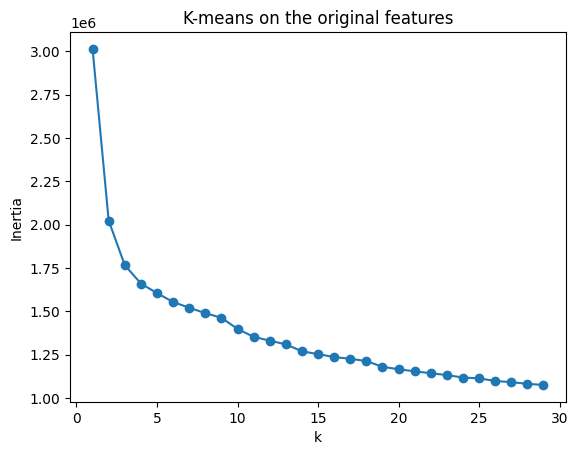

In [17]:
inertia=[]
k_vals = list(range(1, 30))

for k in k_vals:
    km = KMeans(n_clusters=k, random_state=1234)
    km.fit(user_profiles_df.values)
    inertia.append(km.inertia_)
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');
plt.title('K-means on the original features');

In [47]:
best_k=10
km = KMeans(n_clusters=best_k, random_state=1234)
orig_feats_labels=km.fit_predict(user_profiles_df.values)
orig_feats_labels=pd.Series(orig_feats_labels)
orig_feats_labels.index=user_profiles_df.index
orig_feats_labels.name='cluster'
orig_feats_labels

user_id
1        1
2        1
3        8
5        1
7        2
        ..
73511    1
73512    1
73513    1
73515    7
73516    1
Name: cluster, Length: 66974, dtype: int32

In [48]:
orig_feats_labels.value_counts()

cluster
1    24986
3    12975
6     5661
0     5578
5     5160
8     4973
2     3395
7     2969
4     1165
9      112
Name: count, dtype: int64

### PCA of original features

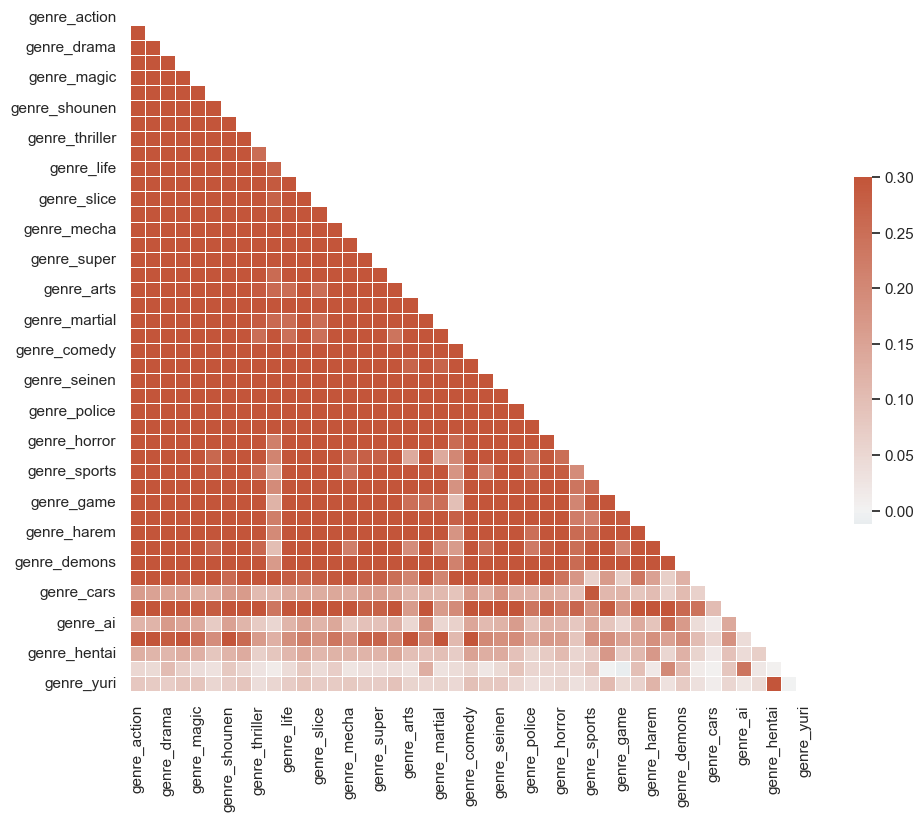

In [21]:
sns.set_theme(style="white")

corr = user_profiles_df.cov()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [22]:
pca=PCA(n_components=45)
pca.fit(user_profiles_df.values)

PCA(n_components=45)

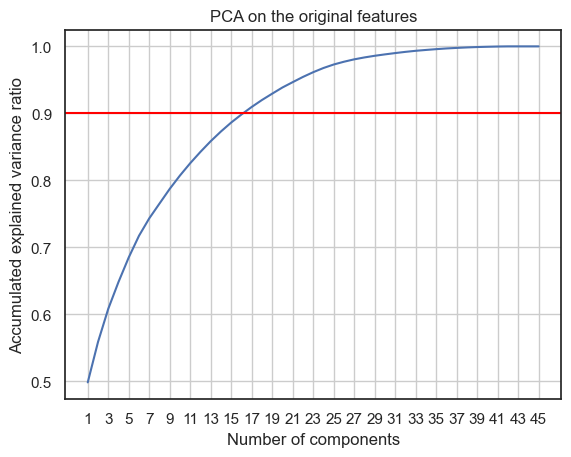

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.axhline(0.9, color='red');
plt.grid();
plt.gca().set_xticks(ticks=np.arange(0,45,2), labels=np.arange(1,46,2));
plt.xlabel('Number of components')
plt.ylabel('Accumulated explained variance ratio');
plt.title('PCA on the original features');

In [34]:
pca=PCA(n_components=16)
reduced_features=pd.DataFrame(pca.fit_transform(user_profiles_df.values))
reduced_features.columns=[f'PC{i}' for i in range(16)]
reduced_features.index=user_profiles_df.index
reduced_features

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
user_id,,,,,,,,,,,,,,,,
1,-4.335479,-0.908471,-0.496372,-0.086805,0.356322,-0.153169,-0.114688,0.554055,0.267209,-0.024063,0.532229,0.015057,0.574662,0.065196,-0.116416,0.141766
2,-4.868599,-0.272040,-0.337549,0.518464,-0.114836,-0.098037,1.116174,0.420141,0.083457,0.007704,0.359980,-0.154913,-0.515254,0.426399,-1.328816,0.160064
3,2.119824,1.222145,-4.414656,0.290859,-0.597859,-0.486100,2.368833,-3.446566,2.274976,2.606734,1.697568,0.198855,0.716943,0.299400,-1.456286,0.138395
5,-4.132008,2.007436,-0.519905,1.189559,-0.798269,-0.258247,0.811529,-2.110649,-1.559498,-1.007826,1.991396,0.135295,1.192247,-0.896277,0.951883,-0.834270
7,7.027694,-0.980847,-1.213754,-0.832466,1.895895,-2.410737,-0.468095,0.885842,2.158368,-0.701155,-0.802440,0.100975,0.037004,-0.175994,-1.663069,-0.992283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73511,-3.526035,-1.336900,0.635095,0.613582,0.448123,-0.979948,-0.097420,0.274497,0.253680,-0.248251,-0.154066,-0.057553,0.169713,0.098955,-0.290806,-0.277740
73512,-4.299415,-0.604353,-0.060420,0.370260,-0.028238,-0.100049,0.010114,-0.261726,0.192552,0.594112,0.119974,0.074393,0.490669,-0.283743,-0.203169,0.104652
73513,-3.105810,0.617184,1.513990,0.514991,0.569225,-0.861928,-0.221230,0.588839,0.786894,0.192230,0.552249,0.020772,0.342108,-0.023287,-0.568902,0.066354


### K-means on PCA features

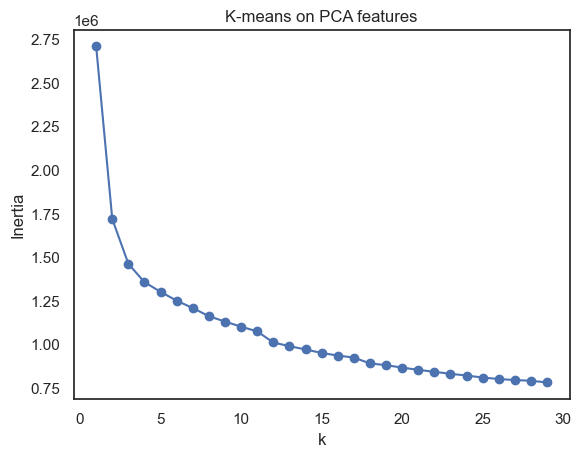

In [36]:
inertia=[]
k_vals = list(range(1, 30))

for k in k_vals:
    km = KMeans(n_clusters=k, random_state=1234)
    km.fit(reduced_features.values)
    inertia.append(km.inertia_)
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');
plt.title('K-means on PCA features');

In [49]:
best_k=12
km = KMeans(n_clusters=best_k, random_state=1234)
reduced_feats_labels=km.fit_predict(reduced_features.values)
reduced_feats_labels=pd.Series(reduced_feats_labels)
reduced_feats_labels.index=user_profiles_df.index
reduced_feats_labels.name='cluster'
reduced_feats_labels

user_id
1        2
2        2
3        9
5        2
7        3
        ..
73511    2
73512    2
73513    2
73515    6
73516    2
Name: cluster, Length: 66974, dtype: int32

In [50]:
reduced_feats_labels.value_counts()

cluster
2     24584
0     12686
4      6394
10     5722
8      5154
9      4097
3      3178
6      2760
1      1102
5       690
7       506
11      101
Name: count, dtype: int64

### predicting

In [83]:
def rating_transform(rating):
    return rating-4

In [84]:
rating_df = pd.read_csv('data/rating_shortened.csv')
rating_df = rating_df[rating_df.rating!=-1]
rating_df = rating_df.groupby(by=['user_id','anime_id']).mean().reset_index()
rating_df.rating = rating_df.rating.apply(rating_transform)
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741989 entries, 0 to 1741988
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 39.9 MB


In [85]:
rated_animes_by_orig_feat_clusters_df=pd.merge(left=orig_feats_labels, 
                                               left_index=True,
                                               right=rating_df, 
                                               right_on='user_id',
                                               how='right')
rated_animes_by_orig_feat_clusters_df

,cluster,user_id,anime_id,rating
0,1,1,8074,6.0
1,1,1,11617,6.0
2,1,1,11757,6.0
3,1,2,11771,6.0
4,8,3,20,4.0
...,...,...,...,...
1741984,7,73515,12461,3.0
1741985,7,73515,13161,4.0
1741986,7,73515,14345,3.0
1741987,7,73515,22145,6.0


In [86]:
rated_animes_by_orig_feat_clusters_df=rated_animes_by_orig_feat_clusters_df.groupby(by=['cluster','anime_id']).rating.sum().to_frame().reset_index().sort_values(by=['cluster', 'rating'], ascending=False).reset_index(drop=True)
rated_animes_by_orig_feat_clusters_df.columns=['cluster','anime_id','sum_of_ratings']
rated_animes_by_orig_feat_clusters_df

,cluster,anime_id,sum_of_ratings
0,9,8074,388.0
1,9,1575,380.0
2,9,2904,365.0
3,9,11757,364.0
4,9,1535,355.0
...,...,...,...
6576,0,5321,-1.0
6577,0,12157,-1.0
6578,0,3211,-2.0
6579,0,11883,-2.0


In [87]:
rated_animes_by_pca_feat_clusters_df=pd.merge(left=reduced_feats_labels, 
                                               left_index=True,
                                               right=rating_df, 
                                               right_on='user_id',
                                               how='right')
rated_animes_by_pca_feat_clusters_df=rated_animes_by_pca_feat_clusters_df.groupby(by=['cluster','anime_id']).rating.sum().to_frame().reset_index().sort_values(by=['cluster', 'rating'], ascending=False).reset_index(drop=True)
rated_animes_by_pca_feat_clusters_df.columns=['cluster','anime_id','sum_of_ratings']
rated_animes_by_pca_feat_clusters_df

,cluster,anime_id,sum_of_ratings
0,11,8074,360.0
1,11,1575,346.0
2,11,2904,329.0
3,11,11757,325.0
4,11,1535,322.0
...,...,...,...
7605,0,13427,-2.0
7606,0,4934,-3.0
7607,0,32735,-3.0
7608,0,3160,-5.0


In [88]:
all_animes=set(rating_df.anime_id)
len(all_animes)

893

In [92]:
unwatched_animes_in_user_cluster_df

,anime_id,sum_of_ratings
5385,16498,15063.0
5387,853,14371.0
5391,5114,11927.0
5392,121,11880.0
5393,226,11462.0
...,...,...
5996,11729,-3.0
5997,15535,-3.0
5998,2792,-4.0
5999,11883,-4.0


In [101]:
def generate_predictions(user_identifier, user_clusters_series, animes_by_clusters_df, number=20):
    user_unwatched_animes = all_animes-set(rating_df[rating_df.user_id==user_identifier].anime_id)
    user_cluster=user_clusters_series.loc[user_identifier]
    unwatched_animes_in_user_cluster_df=animes_by_clusters_df[(
                                            animes_by_clusters_df.cluster==user_cluster)&(
                                            animes_by_clusters_df.anime_id.isin(user_unwatched_animes)
                                            )][['anime_id', 'sum_of_ratings']]
    number=min(number, len(unwatched_animes_in_user_cluster_df))
    if number==0:
        return None
    threshold=unwatched_animes_in_user_cluster_df.iloc[number-1].sum_of_ratings
    unwatched_animes_in_user_cluster_df=unwatched_animes_in_user_cluster_df[
                                           unwatched_animes_in_user_cluster_df.sum_of_ratings>=threshold]
    unwatched_animes_in_user_cluster_df['user_id']=np.tile(user_identifier, len(unwatched_animes_in_user_cluster_df))
    unwatched_animes_in_user_cluster_df.columns=['anime_id', 'score', 'user_id']
    return unwatched_animes_in_user_cluster_df

In [102]:
generate_predictions(user_identifier=5, 
                     user_clusters_series=orig_feats_labels, 
                     animes_by_clusters_df=rated_animes_by_orig_feat_clusters_df, 
                     number=20)

,anime_id,score,user_id
5385,16498,15063.0,5
5387,853,14371.0,5
5391,5114,11927.0,5
5392,121,11880.0,5
5393,226,11462.0,5
5394,1575,10607.0,5
5395,431,10465.0,5
5397,2167,8729.0,5
5398,164,8361.0,5
5399,1,8170.0,5


In [105]:
all_preds_on_orig_feat_clusters=[]
for user_identifier in rating_df.user_id.unique():
    pred = generate_predictions(user_identifier=user_identifier, 
                                user_clusters_series=orig_feats_labels, 
                                animes_by_clusters_df=rated_animes_by_orig_feat_clusters_df)
    if pred is not None:
        all_preds_on_orig_feat_clusters.append(pred)

In [107]:
clustering_predictions_orig_feat_df=pd.concat(all_preds_on_orig_feat_clusters, ignore_index=True)
clustering_predictions_orig_feat_df=clustering_predictions_orig_feat_df[['user_id', 'anime_id', 'score']]
clustering_predictions_orig_feat_df

,user_id,anime_id,score
0,1,1535,27540.0
1,1,16498,15063.0
2,1,199,14997.0
3,1,853,14371.0
4,1,20,13706.0
...,...,...,...
1339597,73516,1,8170.0
1339598,73516,4898,8095.0
1339599,73516,2904,7953.0
1339600,73516,2001,7842.0


In [108]:
clustering_predictions_orig_feat_df.to_csv("data/clustering_predictions_on_original_features.csv", index=False)

In [109]:
all_preds_on_pca_feat_clusters=[]
for user_identifier in rating_df.user_id.unique():
    pred = generate_predictions(user_identifier=user_identifier, 
                                user_clusters_series=reduced_feats_labels, 
                                animes_by_clusters_df=rated_animes_by_pca_feat_clusters_df)
    if pred is not None:
        all_preds_on_pca_feat_clusters.append(pred)

In [110]:
clustering_predictions_pca_feat_df=pd.concat(all_preds_on_pca_feat_clusters, ignore_index=True)
clustering_predictions_pca_feat_df=clustering_predictions_pca_feat_df[['user_id', 'anime_id', 'score']]
clustering_predictions_pca_feat_df

,user_id,anime_id,score
0,1,1535,26610.0
1,1,199,14680.0
2,1,16498,14639.0
3,1,853,14051.0
4,1,20,13281.0
...,...,...,...
1339646,73516,1,8085.0
1339647,73516,4898,7709.0
1339648,73516,2001,7626.0
1339649,73516,2904,7568.0


In [111]:
clustering_predictions_pca_feat_df.to_csv("data/clustering_predictions_on_reduced_features.csv", index=False)

### evaluating

In [2]:
clustering_predictions_pca_feat_df=pd.read_csv("data/clustering_predictions_on_reduced_features.csv")
clustering_predictions_orig_feat_df=pd.read_csv("data/clustering_predictions_on_original_features.csv")

In [3]:
anime_df = pd.read_csv('data/anime_shortened.csv')
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  1000 non-null   int64  
 1   name      1000 non-null   object 
 2   genre     1000 non-null   object 
 3   type      1000 non-null   object 
 4   episodes  1000 non-null   int64  
 5   rating    1000 non-null   float64
 6   members   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [10]:
clustering_predictions_pca_feat_df.anime_id.nunique(), clustering_predictions_orig_feat_df.anime_id.nunique()

(220, 212)

In [12]:
len(set(clustering_predictions_pca_feat_df.anime_id).union(set(clustering_predictions_orig_feat_df.anime_id)))

220

In [16]:
clustering_predictions_pca_feat_df.user_id.nunique()

66974

#### on original features

In [4]:
top_10_by_number_of_recommendations=clustering_predictions_orig_feat_df.groupby(by='anime_id').score.count().sort_values(ascending=False).iloc[:10].to_frame()
top_10_by_number_of_recommendations.columns=['number_of_recommendations']
top_10_by_number_of_recommendations = pd.merge(left=top_10_by_number_of_recommendations, 
                                               left_on='anime_id',
                                               right=anime_df, 
                                               right_on='anime_id',
                                               how='left')
top_10_by_number_of_recommendations

,anime_id,number_of_recommendations,name,genre,type,episodes,rating,members
0,2904,45850,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
1,5114,45464,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,199,44401,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
3,226,43443,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
4,121,43254,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
5,431,43207,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186
6,1575,42849,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
7,4224,41681,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
8,16498,41649,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
9,6547,41580,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


In [5]:
top_10_by_number_of_recommendations.drop(columns=['anime_id', 'genre', 'type', 'episodes', 'members'])

,number_of_recommendations,name,rating
0,45850,Code Geass: Hangyaku no Lelouch R2,8.98
1,45464,Fullmetal Alchemist: Brotherhood,9.26
2,44401,Sen to Chihiro no Kamikakushi,8.93
3,43443,Elfen Lied,7.85
4,43254,Fullmetal Alchemist,8.33
5,43207,Howl no Ugoku Shiro,8.74
6,42849,Code Geass: Hangyaku no Lelouch,8.83
7,41681,Toradora!,8.45
8,41649,Shingeki no Kyojin,8.54
9,41580,Angel Beats!,8.39


In [6]:
score = np.dot(top_10_by_number_of_recommendations.number_of_recommendations, 
               top_10_by_number_of_recommendations.rating) 
score = score / np.sum(top_10_by_number_of_recommendations.number_of_recommendations)
print(f'Average weighted rating of the top 10 most frequently recommended animes: {score:.2f}')

Average weighted rating of the top 10 most frequently recommended animes: 8.64


In [7]:
top_10_by_sum_of_scores=clustering_predictions_orig_feat_df.groupby(by='anime_id').score.sum().sort_values(ascending=False).iloc[:10].to_frame()
top_10_by_sum_of_scores.columns=['sum_of_scores']
top_10_by_sum_of_scores = pd.merge(left=top_10_by_sum_of_scores, 
                                        left_on='anime_id',
                                        right=anime_df, 
                                        right_on='anime_id',
                                        how='left')
top_10_by_sum_of_scores

,anime_id,sum_of_scores,name,genre,type,episodes,rating,members
0,1535,859678506.0,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
1,16498,656205415.0,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
2,199,632255119.0,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
3,5114,618850907.0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
4,1575,565931397.0,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
5,11757,560949400.0,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
6,6547,560721977.0,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
7,853,543285575.0,Ouran Koukou Host Club,"Comedy, Harem, Romance, School, Shoujo",TV,26,8.39,422271
8,226,543037361.0,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
9,121,534958016.0,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384


In [8]:
top_10_by_sum_of_scores.drop(columns=['anime_id', 'genre', 'type', 'episodes', 'members'])

,sum_of_scores,name,rating
0,859678506.0,Death Note,8.71
1,656205415.0,Shingeki no Kyojin,8.54
2,632255119.0,Sen to Chihiro no Kamikakushi,8.93
3,618850907.0,Fullmetal Alchemist: Brotherhood,9.26
4,565931397.0,Code Geass: Hangyaku no Lelouch,8.83
5,560949400.0,Sword Art Online,7.83
6,560721977.0,Angel Beats!,8.39
7,543285575.0,Ouran Koukou Host Club,8.39
8,543037361.0,Elfen Lied,7.85
9,534958016.0,Fullmetal Alchemist,8.33


In [9]:
score = np.dot(top_10_by_sum_of_scores.sum_of_scores, 
               top_10_by_sum_of_scores.rating) 
score = score / np.sum(top_10_by_sum_of_scores.sum_of_scores)
print(f'Average weighted rating of the top 10 animes by sum of recommendation scores: {score:.2f}')

Average weighted rating of the top 10 animes by sum of recommendation scores: 8.53


#### on reduced features

In [119]:
top_10_by_number_of_recommendations=clustering_predictions_pca_feat_df.groupby(by='anime_id').score.count().sort_values(ascending=False).iloc[:10].to_frame()
top_10_by_number_of_recommendations.columns=['number_of_recommendations']
top_10_by_number_of_recommendations = pd.merge(left=top_10_by_number_of_recommendations, 
                                               left_on='anime_id',
                                               right=anime_df, 
                                               right_on='anime_id',
                                               how='left')
top_10_by_number_of_recommendations

,anime_id,number_of_recommendations,name,genre,type,episodes,rating,members
0,2904,45850,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
1,199,45475,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
2,5114,45420,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
3,226,43415,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
4,1575,42849,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
5,121,42805,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
6,431,41671,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186
7,16498,41667,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
8,6547,41491,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
9,4224,41470,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [120]:
score = np.dot(top_10_by_number_of_recommendations.number_of_recommendations, 
               top_10_by_number_of_recommendations.rating) 
score = score / np.sum(top_10_by_number_of_recommendations.number_of_recommendations)
print(f'Average weighted rating of the top 10 most frequently recommended animes: {score:.2f}')

Average weighted rating of the top 10 most frequently recommended animes: 8.64


In [121]:
top_10_by_sum_of_scores=clustering_predictions_pca_feat_df.groupby(by='anime_id').score.sum().sort_values(ascending=False).iloc[:10].to_frame()
top_10_by_sum_of_scores.columns=['sum_of_scores']
top_10_by_sum_of_scores = pd.merge(left=top_10_by_sum_of_scores, 
                                        left_on='anime_id',
                                        right=anime_df, 
                                        right_on='anime_id',
                                        how='left')
top_10_by_sum_of_scores

,anime_id,sum_of_scores,name,genre,type,episodes,rating,members
0,1535,831897074.0,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
1,16498,639173804.0,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
2,199,621699131.0,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
3,5114,600881871.0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
4,11757,547195747.0,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
5,1575,545080555.0,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
6,6547,541094745.0,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
7,226,525342744.0,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
8,853,521741687.0,Ouran Koukou Host Club,"Comedy, Harem, Romance, School, Shoujo",TV,26,8.39,422271
9,121,509909087.0,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384


In [122]:
score = np.dot(top_10_by_sum_of_scores.sum_of_scores, 
               top_10_by_sum_of_scores.rating) 
score = score / np.sum(top_10_by_sum_of_scores.sum_of_scores)
print(f'Average weighted rating of the top 10 animes by sum of recommendation scores: {score:.2f}')

Average weighted rating of the top 10 animes by sum of recommendation scores: 8.53
